In [ ]:
!pip install prophet

Import Libraries

In [3]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet

Read DataSet

In [48]:
df = pd.read_csv('/content/MaunaLoaDailyTemps.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1821 non-null   int64  
 5   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.5+ KB


In [50]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [51]:
df=df[["DATE","AvgTemp"]]
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


# Change Column Names for FB Prophet

In [52]:
df.columns = ['ds','y']

In [53]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


# Plot Your Data

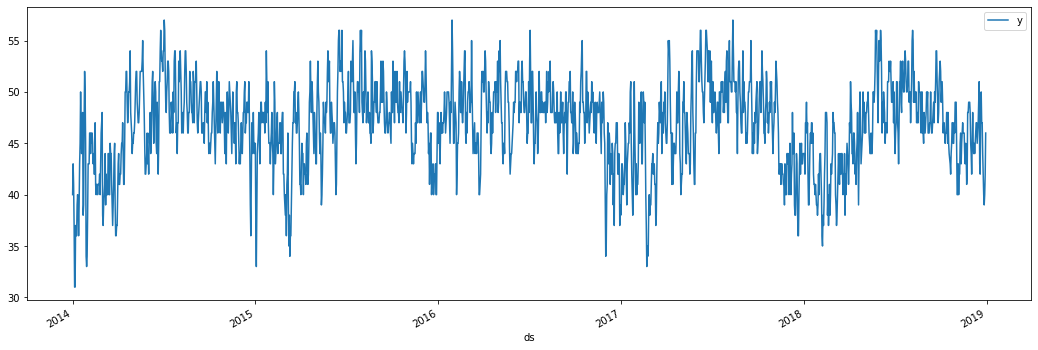

In [10]:
df.plot(x='ds',y='y',figsize=(18,6))

In [33]:
len(df)

1821

# Train, Test Split

In [54]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

# Start Making Predictions

In [55]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1816,2018-12-25,46.213746,36.484826,45.624828,44.631620,47.730319,-4.953692,-4.953692,-4.953692,-0.145967,-0.145967,-0.145967,-4.807725,-4.807725,-4.807725,0.0,0.0,0.0,41.260054
1817,2018-12-26,46.213032,36.610016,45.620884,44.622257,47.737135,-4.907730,-4.907730,-4.907730,-0.052356,-0.052356,-0.052356,-4.855374,-4.855374,-4.855374,0.0,0.0,0.0,41.305302
1818,2018-12-27,46.212318,37.171813,45.465787,44.610715,47.743469,-4.776050,-4.776050,-4.776050,0.098725,0.098725,0.098725,-4.874776,-4.874776,-4.874776,0.0,0.0,0.0,41.436268
1819,2018-12-28,46.211604,37.389234,46.516190,44.603912,47.746227,-4.438650,-4.438650,-4.438650,0.426894,0.426894,0.426894,-4.865544,-4.865544,-4.865544,0.0,0.0,0.0,41.772954
1820,2018-12-29,46.210890,36.917021,46.074811,44.590268,47.746403,-4.833539,-4.833539,-4.833539,-0.005755,-0.005755,-0.005755,-4.827784,-4.827784,-4.827784,0.0,0.0,0.0,41.377351


In [56]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1816,2018-12-25,41.260054,36.462314,45.455911
1817,2018-12-26,41.305302,36.644995,45.820389
1818,2018-12-27,41.436268,37.206468,45.955254
1819,2018-12-28,41.772954,37.199809,46.722431
1820,2018-12-29,41.377351,36.889298,46.164944


In [38]:
test.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


# USING BUILT-IN FB PROPHET VISUALIZATION
#  

In [19]:
plot_plotly(m ,forecast)

In [20]:
plot_components_plotly(m, forecast)

# Evaluate Your Model

In [45]:
from statsmodels.tools.eval_measures import rmse

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [43]:
predictions = forecast.iloc[-365:]['yhat']

In [46]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  3.461167223725586
Mean Value of Test Dataset: 46.3041095890411
